## Varying $q$

In [38]:
vq_df = get_all_data('ilp', 'vq_', 66)
vq_df.head()

objective  instruction (# learners)  \
experiment instance                                        
1          1           4240.58                       208   
           2           4435.25                       181   
           3           4437.15                       176   
           4           4355.51                       208   
           5           4216.77                       176   

                     self-study (# learners)  activities (#)  \
experiment instance                                            
1          1                             592              43   
           2                             619              43   
           3                             624              43   
           4                             592              43   
           5                             624              43   

                                            instruction activity sizes  
experiment instance                                                     
1          1         [8, 5, 5, 5, 10, 7, 6, 6, 7, 9, 6, 8, 7, 6, 8,...  
           2         [6, 9, 8, 6, 6, 7, 6, 7, 6, 5, 5, 5, 6, 7, 5, ...  
           3         [8, 6, 5, 7, 6, 6, 6, 6, 9, 7, 8, 5, 6, 7, 5, ...  
           4         [6, 6, 7, 8, 7, 8, 6, 9, 6, 12, 11, 7, 7, 8, 7...  
           5         [6, 5, 5, 6, 6, 6, 7, 6, 7, 5, 6, 7, 5, 5, 10,...

In [39]:
vq_exps = pd.read_excel("experiments/vq_experiments.xlsx", index_col="experiment")
vq_exps.head()

,penalty,progress,learners,instruction_classrooms,instruction_size,self_study_classrooms,self_study_size,num_teachers,first_degree,second_degree,third_degree
experiment,,,,,,,,,,,
1,1,2,800,40,32,3,80,80,1.00,0,0.00
2,1,2,800,40,32,3,80,80,0.90,0,0.10
3,1,2,800,40,32,3,80,80,0.80,0,0.20
4,1,2,800,40,32,3,80,80,0.70,0,0.30
5,1,2,800,40,32,3,80,80,0.60,0,0.40


In [40]:
vq_df = vq_df.reset_index()
vq_df = vq_df.join(vq_exps, on='experiment')
vq_df.head()

,experiment,instance,objective,instruction (# learners),self-study (# learners),activities (#),instruction activity sizes,penalty,progress,learners,instruction_classrooms,instruction_size,self_study_classrooms,self_study_size,num_teachers,first_degree,second_degree,third_degree
0,1,1,4240.58,208,592,43,"[8, 5, 5, 5, 10, 7, 6, 6, 7, 9, 6, 8, 7, 6, 8,...",1,2,800,40,32,3,80,80,1.00,0,0.00
1,1,2,4435.25,181,619,43,"[6, 9, 8, 6, 6, 7, 6, 7, 6, 5, 5, 5, 6, 7, 5, ...",1,2,800,40,32,3,80,80,1.00,0,0.00
2,1,3,4437.15,176,624,43,"[8, 6, 5, 7, 6, 6, 6, 6, 9, 7, 8, 5, 6, 7, 5, ...",1,2,800,40,32,3,80,80,1.00,0,0.00
3,1,4,4355.51,208,592,43,"[6, 6, 7, 8, 7, 8, 6, 9, 6, 12, 11, 7, 7, 8, 7...",1,2,800,40,32,3,80,80,1.00,0,0.00
4,1,5,4216.77,176,624,43,"[6, 5, 5, 6, 6, 6, 7, 6, 7, 5, 6, 7, 5, 5, 10,...",1,2,800,40,32,3,80,80,1.00,0,0.00


In [41]:
vq_df["self-study (% learners)"] = vq_df["self-study (# learners)"] 
vq_df.loc[vq_df.learners == 800, "self-study (% learners)"] /= 8
vq_df.loc[vq_df.learners == 1600, "self-study (% learners)"] /= 16

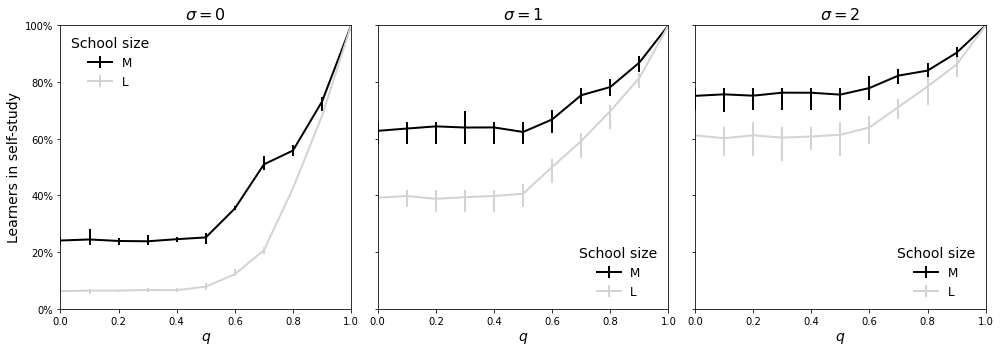

In [43]:
_, axes = plt.subplots(1, 3, figsize=(14, 5), sharey=True)
palette = {800: 'black', 1600: 'lightgrey'}

for ax, sig in zip(axes, [0, 1, 2]):
    for learners in [800, 1600]:
        res = (vq_df[(vq_df.progress == sig) & (vq_df.learners == learners)]["self-study (% learners)"]
                .groupby([vq_df.third_degree, vq_df.learners]).agg(["min", "mean", "max"]))

        errors = res[["min", "max"]].copy()
        errors["min"] = res["mean"] - res["min"]
        errors["max"] = res["max"] - res["mean"]

        res = res.reset_index()
        res.plot(ax=ax, x="third_degree", y="mean", yerr=errors.values.T, color=palette[learners])
    
    if ax is axes[0]:
        ax.legend(["M", "L"], title="School size", frameon=False, loc="upper left")
    else:
        ax.legend(["M", "L"], title="School size", frameon=False, loc="lower right")
        
    ax.set_xlim([0, 1])
    ax.set_ylim([0, 100])
    ax.set_xlabel("$q$")
    ax.set_ylabel("Learners in self-study")
    ax.set_title(f"$\\sigma = {sig}$")

    ax.yaxis.set_major_formatter(mtick.PercentFormatter(decimals=0))

plt.tight_layout()
plt.savefig("out/varying_third_degree.pdf", bbox_inches='tight');